In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

# Funcation

R(x)=1/(1+x^2)

In [4]:
def f(x):
    return 1/(1+x**2)

def lagF(x):
    xPoint = [-5+i for i in range(11)] #插值点
    yPoint = [1/(1+i**2) for i in xPoint]
    c = np.ones(11)   #各项系数
    for i in range(11):
        temp = xPoint.copy()
        del temp[i]   #去除参考点
        temp = np.array(temp)
        tempList =(x-temp)/(xPoint[i]-temp)
        for k in tempList:
            c[i] = c[i]*k
        c[i] = c[i]*yPoint[i]
    return c.sum()


def cheF(x):
    xPoint = [5*math.cos((2*i+1)*math.pi/22) for i in range(11)]  # 切比雪夫插值点
    yPoint = [1/(1+i**2) for i in xPoint]
    c = np.ones(11)  # 各项系数
    for i in range(11):
        temp = xPoint.copy()
        del temp[i]  # 去除参考点
        temp = np.array(temp)
        tempList = (x-temp)/(xPoint[i]-temp)
        for k in tempList:
            c[i] = c[i]*k
        c[i] = c[i]*yPoint[i]
    return c.sum()


# Figure

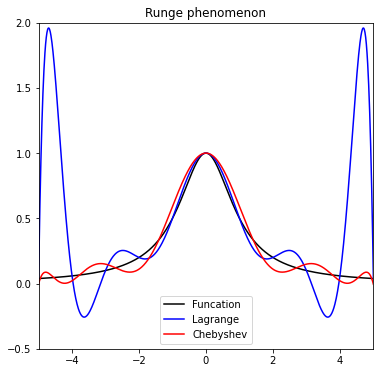

In [7]:
xData = np.arange(-5,5.01,0.01)
yFun = f(xData)
yLag = [lagF(i) for i in xData]
yChe = [cheF(i) for i in xData]
fig = plt.figure(figsize=(6,6))
plt.plot(xData,yFun,'k',label='Funcation')
plt.plot(xData,yLag,'b',label='Lagrange')
plt.plot(xData,yChe,'r',label='Chebyshev')
plt.xlim(-5,5)
plt.ylim(-0.5,2.0)
plt.legend()
plt.title('Runge phenomenon')
plt.savefig('Lagrange.jpeg',dpi=200)